# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     852.3
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           2.66e-40
Time:                        13:04:16   Log-Likelihood:                -1.5744
No. Observations:                  50   AIC:                             11.15
Df Residuals:                      46   BIC:                             18.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0073      0.089     56.430      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50795234  5.00197207  5.45474835  5.83737581  6.13138089  6.33175698
  6.44778698  6.50151815  6.52413982  6.55085906  6.61511625  6.74309096
  6.94940066  7.23469916  7.58556917  7.97672672  8.37517527  8.74562691
  9.05630009  9.28414124  9.41861238  9.46342251  9.43591822  9.3642337
  9.28266836  9.22605153  9.22402013  9.29614938  9.44873666  9.67376685
  9.95022922 10.2475694  10.53070943 10.76581089 10.92583453 10.99498271
 10.97129491 10.86696982 10.70636118 10.52197648 10.34913609 10.22017022
 10.15910717 10.17772554 10.27361902 10.43059178 10.62131937 10.81183804
 10.96712494 11.0568522 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.04822213 10.90016048 10.63346682 10.29554077  9.94877688  9.65528831
  9.46169934  9.3877301   9.42136844  9.5218109 ]


## Plot comparison

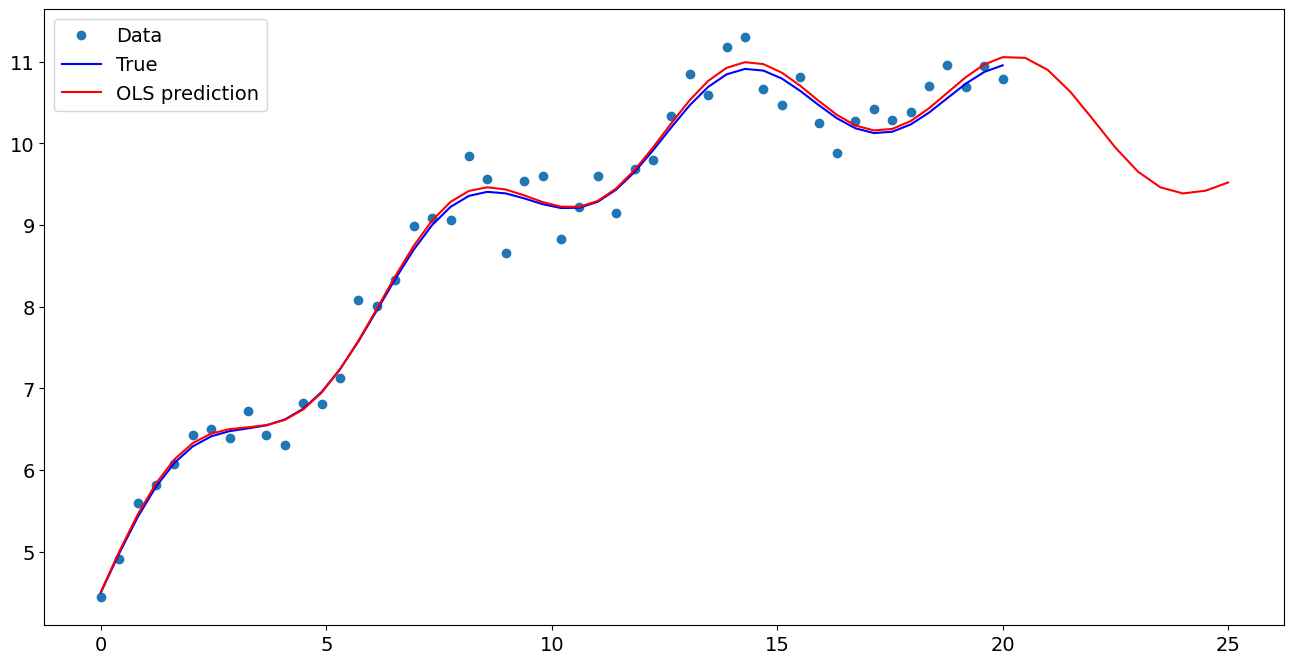

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.007314
x1                  0.502979
np.sin(x1)          0.530382
I((x1 - 5) ** 2)   -0.019974
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.048222
1    10.900160
2    10.633467
3    10.295541
4     9.948777
5     9.655288
6     9.461699
7     9.387730
8     9.421368
9     9.521811
dtype: float64